# Intro 4: Entanglement

Material adapted from https://github.com/amcdawes/QMlabs. I also recommend https://github.com/jrjohansson/scientific-python-lectures for a much more general approach to Python

## Concept of entanglement

We know that the state of a system composed of two subsystems belongs to the Hilbert space obtained as the tensor product of the two Hilbert spaces which contain the states of the factors
$$
\psi\in \mathcal{H}=\mathcal{H}_1\otimes \mathcal{H}_2
$$
Hence, the state of a pair of qubits must belong to the Hilbert space $\mathbb{C}^4=\mathbb{C}^2\otimes \mathbb{C}^2$. Thus, states such as 
$$
|1,1\rangle= |+\rangle \otimes |+\rangle=\begin{pmatrix} 1 \\ 0 \\ 0\\0\end{pmatrix},
$$
which represents one of the eigenstates with total spin equal to 1 is obtained as the tensor product of two perfectly defined states of each spin. This is an example of a **separable state**.  

Nonetheless, not all elements of $\mathbb{C}^4$ can be written as a tensor product of $\mathbb{C}^2$--states. Indeed, consider for instance the following state:
$$
|0,0\rangle=\frac 1{\sqrt{2}}\left (|+\rangle\otimes |-\rangle -|-\rangle \otimes |+\rangle    \right )=\frac 1{\sqrt{2}} \begin{pmatrix} 0 \\ 1 \\ -1\\0\end{pmatrix}
$$
This is a perfectly valid vector in $\mathbb{C}^4$ and therefore a valid state for the pair of qubits. Nonetheless, it is not possible to find a pair of qubit states such that their product coincides with it.  This is an example of an **entangled state**: it is a perfectly defined state of the pair of qubits, but it does not contain a definite state of any of them. 

Identifying entanglement is a very useful feature which becomes terribly important in Quantum Information Theory. There exists many possible measures to estimate the degree of (bipartite) entanglement of a system. And qutip includes some of them. Probably the simplest one is the **concurrence** of a state. In the case of a pure state $|\psi\rangle ∈ \mathbb{C}^4$ the councurrence is defined as:
$$
\mathbb{C}^4\ni |\psi\rangle =\begin{pmatrix} \alpha_1 \\ \alpha_2 \\ \alpha_3 \\ \alpha_4 \end{pmatrix}, \quad \alpha_1, \alpha_2, \alpha_3, \alpha_4\in \mathbb{C} \quad \Rightarrow \mathcal{C}(|\psi\rangle)\propto|\alpha_1\alpha_4-\alpha_2\alpha_3|
$$
The concurrence is equal to zero for separable states and different from zero for entangled states. In qutip, there exists a function concurrence(state), which computes it for the given state 'state'.

In [1]:
from numpy import  linspace

from qutip import *
# Importing matplotlib for graphics and fixing the default size of plots
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,9)

C:\Users\pc\ANa\Lib\site-packages\qutip\__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [2]:
ψ1=tensor(basis(2,0), basis(2,0))
ψ2=(tensor(basis(2,0), basis(2,1))-tensor(basis(2,1), basis(2,0))).unit()

In [3]:
ψ2

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.70710678]
 [-0.70710678]
 [ 0.        ]]

In [4]:
concurrence(ψ1) #Mide el entrelazamiento (separabilidad)

0

ψ1 es separable

In [5]:
concurrence(ψ2)

0.9999999999999998

ψ2 no es separable

It is important to understand how this property changes, for instance, along the dynamics. If we consider the unitary evolution with respect to a quantum Hamiltonian 
$$
H=J_1\sigma_1\otimes \sigma_1+J_2\sigma_2 \otimes \sigma_2+J_3\sigma_3\otimes \sigma_3,
$$
we can try to represent the entanglement of a state along a trajectory

In [6]:
J1=2
J2=3
J3=-1
H=J1*tensor(sigmax(), sigmax())+J2*tensor(sigmay(), sigmay())+J3*tensor(sigmaz(), sigmaz())
#Vamos a ver si la separabilidad se mantiene al aplicar el Hamiltoniano

In [7]:
tlist=linspace(0,10,1000)
# This function reproduces the action of the evolution operator on state 'state' at the times of 'tlist'
def traj(state, H,  tlist):
    result=[((-1j*t*H).expm())*state for t in tlist]
    return result

In [8]:
ψ1t=traj(ψ1, H, tlist)
ψ2t=traj(ψ2, H, tlist)

In [9]:
Conc1=[concurrence(j) for j in ψ1t] 
Conc2=[concurrence(j) for j in ψ2t]

We can learn now to plot the resulting vectors by using the functions of the library matplotlib. Hopefully, the following examples will be clear enough. Notice that matplotlib admits label written in latex, and this helps to create elegant plots in a simple way.

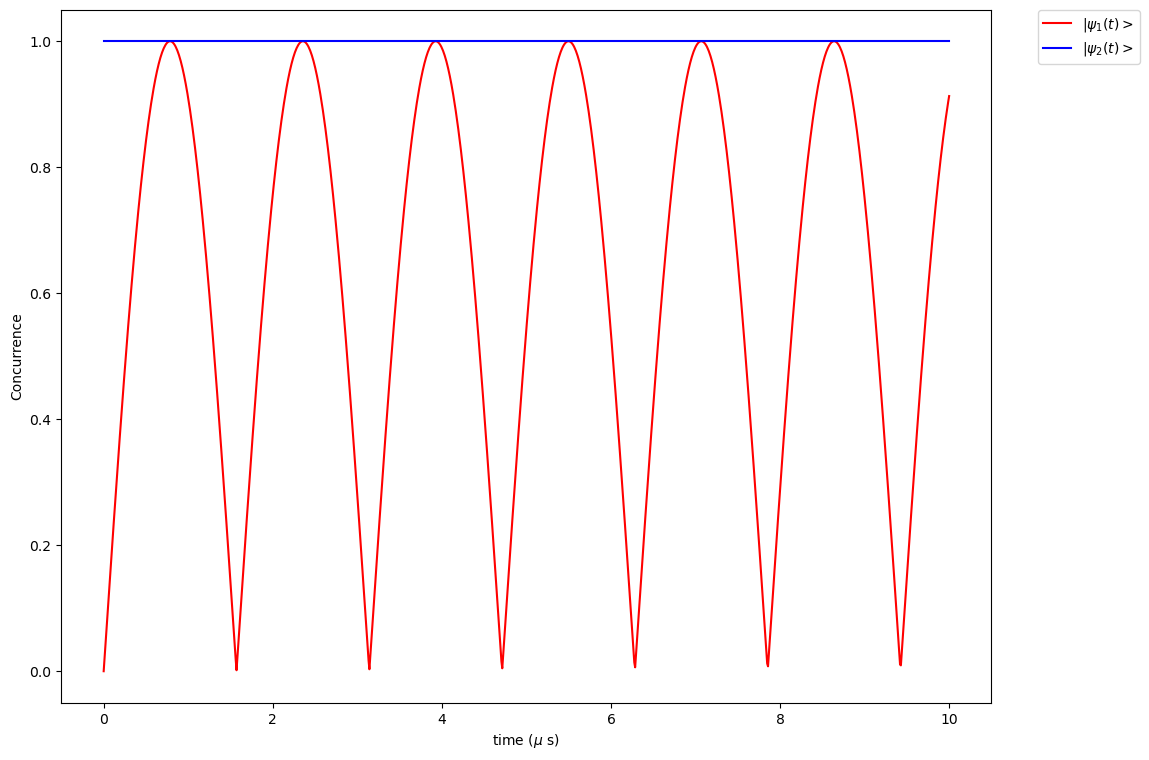

In [10]:
plt.plot(tlist, Conc1,'r',label="$|\\psi_1(t)>$")
plt.plot(tlist, Conc2,'b',  label='$|\\psi_2(t)>$')
plt.xlabel('time ($\\mu$ s)')
plt.ylabel('Concurrence')
#plt.text(1.3, 0.45, '$\\gamma(t)=-\\log \\,P(t)/t$',color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ψ2 siempre esta entrelzado
ψ1 partiendo de un estado separable, la evolucion hace que el entrelazamiento cambie en el tiempo. Entra y sale del subconjunto de estados separables

As we see, separability is not preserved by evolution, if that evolution couples both spins. If, instead, we considered a different Hamiltonian, not coupling the spins:
$$
H_b=B_x^1\sigma_x\otimes \sigma_0+B_y^1\sigma_y\otimes \sigma_0+B_z^1\sigma_z\otimes \sigma_0 + B_x^2\sigma_0\otimes \sigma_x+ B_y^2\sigma_0\otimes \sigma_y+ B_z^2\sigma_0\otimes \sigma_z
$$

In [11]:
B1a=2
B2a=3
B3a=-1
B1b=2
B2b=3
B3b=-1
#Se acopla a cada espin un campo magnetico externo. B*sigma (x) identidad, (x) producto escalar
Hb=B1a*tensor(sigmax(), qeye(2))+B2a*tensor(sigmay(), qeye(2))+B3a*tensor(sigmaz(), qeye(2))+ B1b*tensor(qeye(2),sigmax())+B2b*tensor(qeye(2),sigmay())+B3b*tensor(qeye(2),sigmaz())

In [12]:
ψ1bt=traj(ψ1, Hb,  tlist) 
ψ2bt=traj(ψ2, Hb, tlist)

In [13]:
Concb1=[concurrence(j) for j in ψ1bt]
Concb2=[concurrence(j) for j in ψ2bt]

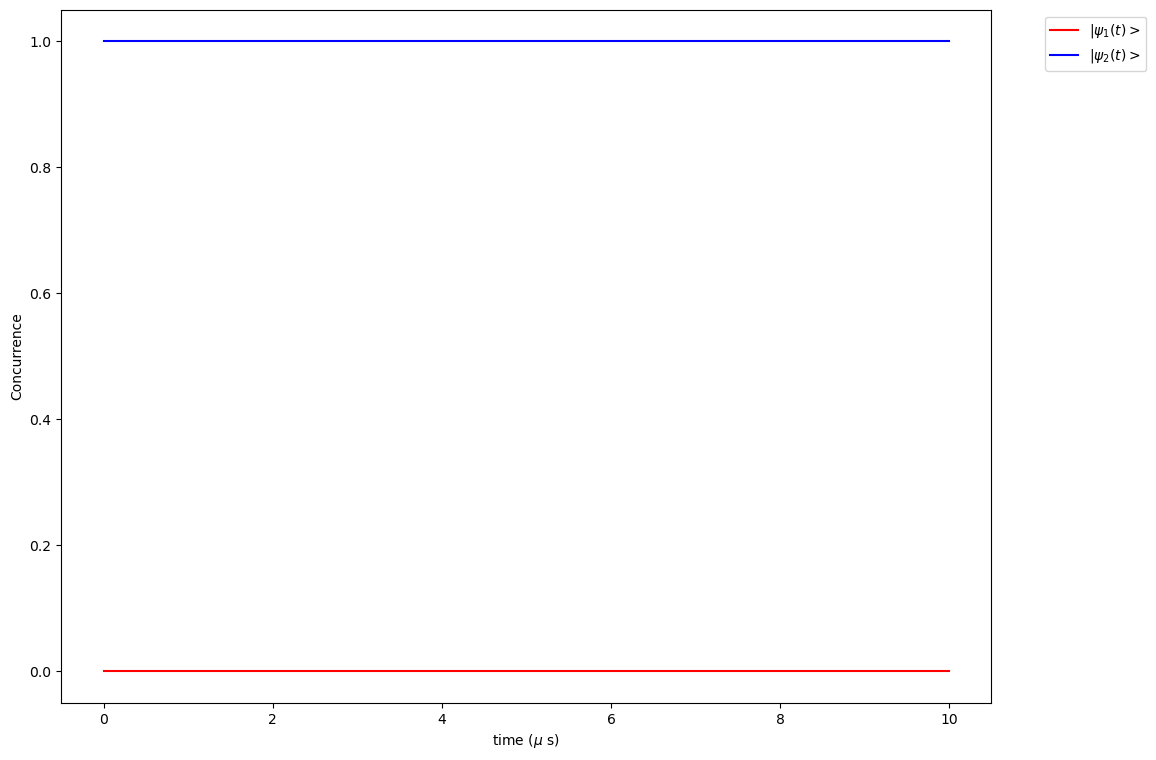

In [14]:
plt.plot(tlist, Concb1,'r',label="$|\psi_1(t)>$")
plt.plot(tlist, Concb2,'b',  label='$|\psi_2(t)>$')
plt.xlabel('time ($\\mu$ s)')
plt.ylabel('Concurrence')
#plt.text(1.3, 0.45, '$\\gamma(t)=-\\log \\,P(t)/t$',color='red')
plt.legend(bbox_to_anchor=(1.05, 1))

Las concurrencias no cambian.

As we see, if the Hamiltonian does not couple the spins, unitary evolution does not modify the separability/entanglement of the state.

    
## The definition of mixed states

Pure states $|\psi\rangle \in \mathcal{H}$ or $\rho_\psi\in \mathrm{Herm}(n)$ are the most general quantum states for isolated systems. Nonetheless, real systems are never isolated and therefore it is possible to find physical systems which can not be modelled as a pure state. The best known example are systems which are a fixed temperature T, as a result of the interaction with a thermal bath. Another common situation may be the statistical (classical) mixtures of quantum particles generated in large ensembles. Imagine, for instance, that we have a source of photons, which creates light quanta with two different states of polarization. Each photon has a precise polarization (left or right) , but there is a certain probability for the photon to be emited with one or the other. Notice that, in that case, the state can **not be described as a linear combination** 
$$
\alpha|L\rangle +β |R\rangle,
$$
since those states would have a particular direction of polarization, with respect to some axis, different from L or R. Instead, the situation is that we have a certain probability to find photons of one type and a certain probability to find photons of the other. This is a **classical** probability distribution, between two types of events ('the polarization of the photon is measured as left polarization' and 'the polarization of the photon is measured as right polarization').  In order to define that classical distribution of pure states, we use a **convex combination** of the rank one projectors, in the form:
$$
\hat \rho=\alpha \hat \rho_{L}+(1-\alpha) \hat \rho_{R}, \qquad 0\leq \alpha\leq 1.
$$
Hence, the probability to measure a left-polarized photon would be $\alpha$ and the probability to measure a right-polarized one would be $1-\alpha$.

In a general situation, a **mixed quantum state** is then written as a convex combination of pure states $\{\hat \rho_j\}$ for $j=1, \cdots, k$,    in the form
$$
\hat \rho =\alpha_1\hat \rho_1+\alpha_2\hat \rho_2+\cdots+ \alpha_k\hat \rho_k; \qquad 0≤ \alpha_j ≤ 1; \qquad \sum_{j=1}^k\alpha_j=1
$$

As a conclusion, the general properties of a general density matrix $\hat \rho$ are the following:
  1. It is self-adjoint $\hat \rho^\dagger=\hat \rho$
  2. $\mathrm{Tr} \hat \rho=1$
  3. It is positive definite

Notice that a general $\hat \rho$ is no longer a projector, i,e,
$$
\hat \rho^2\neq \hat \rho.
$$
Therefore, its eigenvalues need not be 0 or 1, and any real number between 0 and 1 can be obtained (this is due to conditions 2 and 3 above).

We can detect whether a given density matrix $\hat \rho$ is representing a pure state or a mixed state by computing its **purity**, which is defined as the trace of the square of $\hat \rho$:
$$
\mathcal{P}(\hat \rho)=\mathrm{Tr}\hat \rho^2.
$$
If  the state is a projector, its purity is equal to 1 and it is a pure state. If it is lower than 1, the density matrix $\hat \rho$ represents a mixed state. Entanglement of the state does not play any role in its purity.

In [15]:
def purity(rho):
    result=(rho**2).tr()
    return result

In [16]:
ρψ1=ψ1*ψ1.dag()
ρψ2=ψ2*ψ2.dag()

In [17]:
purity(ρψ1)

1.0

In [18]:
purity(ρψ2)

0.9999999999999996

##  The concept of partial trace.

If the quantum system has a certain structure of subsystems, we saw above how the Hilbert space is written as a tensor product

$$
\mathcal{H}=\mathcal{H}_1\otimes\mathcal{H}_2.
$$

We know that the tensor product of a basis of $\mathcal{H}_1$ and a basis of $\mathcal{H}_2$  defines a basis for the tensor product space, i.e., 

$$
\begin{cases}
\mathrm{span}_{\mathbb{C}}\left \{ |e^1_j\rangle \right \}_{j=1,2, ...}=\mathcal{H}_1 \\
\mathrm{span}_{\mathbb{C}}\left \{ |e^2_k\rangle \right \}_{k=1,2, ...}=\mathcal{H}_2
\end{cases}
\Rightarrow
\mathrm{span}_\mathbb{C}\left \{ |e^1_j\rangle \otimes |e^2_k\rangle \right \}_{j,k=1,2, ...}=\mathcal{H}
$$

If, for the sake of simplicity, we consider the case of two qubits, rank-1 projectors on $\mathcal{H}$ correspond then to $(1,1)$ tensors on $\mathbb{C}^4$. The matrix representation of those elements with respect to the basis above can then be written as

$$
\hat \rho_{{j_1}{j_2}}^{{k_1}{k_2}},
$$

where $j_1, k_1$ are indices of the first qubit (hence $j_1, k_1=1, 2$) and $j_2, k_2$ are indices of the second (hence $j_2, k_2=1, 2$). From this point of view, that matrix representation can also be considered as the matrix representation of a (2,2) tensor on $\mathbb{C}^2$. Hence, we may consider the contractions of the tensors:

$$
\hat \rho_1=\mathcal{C}_2^2 \rho:=\mathrm{Tr}_2\hat \rho; \quad (\rho_1)_{j_1}^{k_1}=\sum_{s=1}^2 \hat \rho_{{j_1}{s}}^{{k_1}{s}}; 
$$

and

$$
\rho_2=\mathcal{C}_1^1 \rho:=\mathrm{Tr}_1\hat \rho; \quad (\rho_2)_{j_2}^{k_2}=\sum_{s=1}^2 \hat \rho_{{s}{j_2}}^{{s}{k_2}}.
$$

For instance, if a density matrix of a pair of qubits can be written as a tensor product:

$$
\hat \rho=\begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix} ⊗ \begin{pmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{pmatrix},
$$

it is immediate to verify that the contraction represents the trace of one of the two factors, i.e.:

$$
\mathrm{Tr}_2 \hat \rho=(b_{11}+b_{22})\begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix}
$$

and

$$
\mathrm{Tr}_1 \hat \rho=(a_{11}+a_{22})\begin{pmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{pmatrix}.
$$

To some extent, in this process we  **averaged** the role of one of the subsystems for each particular state of the other since we sum over all possible values. The resulting density matrix refers to the remaining subsystem and completely 
characterizes its behavior. This operation is known as a **partial trace** of the original density matrix $\hat \rho$.

The resulting operator can be proved to satify conditions 1-3 above, and therefore to represent an acceptable density matrix for the corresponding subsystem. **General density matrices satisfying conditions 1-3 represent thus the most general representation for a real quantum state.**

Tr1p=traza de 1*p;
Tr2p=traza de 2*p

Qutip includes a command to compute partial traces of density matrices (or pure states). It acts as a suffix on the state (vector or density matrix). We must provide the number of the subsystem that must be traced out

In [19]:
ψ=(tensor(basis(2,0), basis(2,1))+3*tensor(basis(2,1), basis(2,0))+tensor(basis(2,0), basis(2,0))).unit()

In [20]:
ψ

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.30151134]
 [0.30151134]
 [0.90453403]
 [0.        ]]

In [21]:
ψ.ptrace(0) #qtip tiene traza parcial

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.18181818 0.27272727]
 [0.27272727 0.81818182]]

In [22]:
ψ.ptrace(1) 

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.90909091 0.09090909]
 [0.09090909 0.09090909]]

We can verify that the result is the same if we apply the ptrace operator to the corresponding projector:

In [23]:
ρψ=ψ*ψ.dag()

In [24]:
ρψ

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.09090909 0.09090909 0.27272727 0.        ]
 [0.09090909 0.09090909 0.27272727 0.        ]
 [0.27272727 0.27272727 0.81818182 0.        ]
 [0.         0.         0.         0.        ]]

In [25]:
ρ1=ρψ.ptrace(0)
ρ1

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.18181818 0.27272727]
 [0.27272727 0.81818182]]

In [26]:
ρ2=ρψ.ptrace(1)
ρ2

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.90909091 0.09090909]
 [0.09090909 0.09090909]]

Partial traces will not be, in general, pure states. Hence, the matrices will not correspond to projectors and thus:
$$
\hat \rho_1=\mathrm{Tr}_2\hat \rho ; \qquad \hat \rho_1^2\neq \hat \rho_1
$$
and equivalently
$$
\hat \rho_2=\mathrm{Tr}_1\hat \rho ; \qquad \hat \rho_2^2\neq \hat \rho_2
$$
Indeed:

In [27]:
ρ1**2==ρ1

False

In [28]:
ρ2**2==ρ2

False

In [29]:
ρψ**2==ρψ

True

When can we obtain a pure state after a partial trace? If the original state is separable
$$
|\psi\rangle=|\psi_1\rangle \otimes |\psi_2\rangle,
$$
it is immediate that
$$
\hat \rho_\psi=\frac{|\psi\rangle \langle \psi|}{\langle \psi|\psi \rangle}=
\frac{|\psi_1\rangle \langle \psi_1|}{\langle \psi_1|\psi_1 \rangle}\otimes \frac{|\psi_2\rangle \langle \psi_2|}{\langle \psi_2|\psi_2 \rangle},
$$
where, remember, the factors $\hat \rho_1=\frac{|\psi_1\rangle \langle \psi_1|}{\langle \psi_1|\psi_1 \rangle}$ and $\hat \rho_2=\frac{|\psi_2\rangle \langle \psi_2|}{\langle \psi_2|\psi_2 \rangle}$ are well defined projectors and therefore of unit trace.  

And it is immediate that
$$
\mathrm{Tr}_2\hat \rho_\psi=\hat \rho_{\psi_1}\otimes\left ( \mathrm{Tr} \hat \rho_{\psi_2} \right )=\hat \rho_{\psi_1}
$$

$$
\mathrm{Tr}_1\hat \rho_\psi=\left ( \mathrm{Tr} \hat \rho_{\psi_1} \right )\otimes \hat \rho_{\psi_2}=\hat \rho_{\psi_2}
$$

Remember that
$$
\hat \rho_1^2=\hat \rho_1; \qquad \hat \rho_2^2=\hat \rho_2,
$$
and therefore
$$
\mathrm{Tr}\hat \rho_1=\sum_{k=1}^2 \hat {(\rho_1)}^k_k=\sum_k \sum_s \hat \rho_{ks}^{ks}=\mathrm{Tr}\hat \rho_\psi=1=\sum_k \sum_s \hat \rho_{sk}^{sk}=\mathrm{Tr}\hat \rho_\psi=\sum_{k=1}^2 \hat {(\rho_2)}^k_k=\mathrm{Tr}\hat \rho_2.
$$
We conclude from these expressions that the partial trace of a separable state produces a pure state of one of the subsystems. This property can be measured by using the purity of the resulting reduced state:

In [30]:
purity(ρ1)

0.8512396694214873

In [31]:
purity(ρ2)

0.8512396694214872

In [32]:
purity(ρψ)

0.9999999999999996

In [33]:
ρ1b=ρψ1.ptrace(0)
ρ1b

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [34]:
purity(ρ1b)

1.0

Hence, state $\rho\psi$ above is entangled, but state $\rho\psi 1$ is separable. We conclude that we can use the purity of the reduced state to estimate the entanglement of the original (large) state. If we compare this measure of entanglement with the concurrence we can verify, for the unitary evolution obtained above that:

In [35]:
Purity=[purity((j*j.dag()).ptrace(0)) for j in ψ1t]

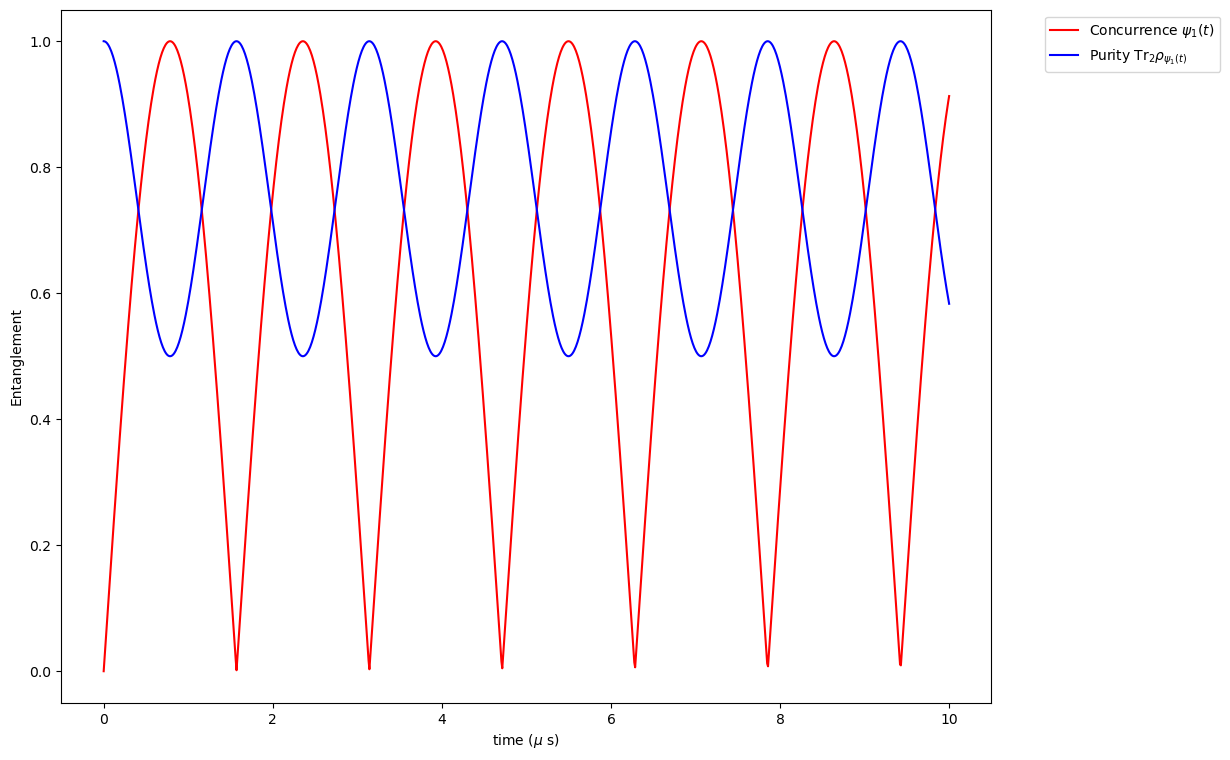

In [36]:
plt.plot(tlist, Conc1,'r',label='Concurrence $\\psi_1(t)$')
plt.plot(tlist, Purity,'b',  label="Purity $\\mathrm{Tr}_2\\rho_{\\psi_1(t)}$")
plt.xlabel('time ($\\mu$ s)')
plt.ylabel('Entanglement')
#plt.text(1.3, 0.45, '$\\gamma(t)=-\\log \\,P(t)/t$',color='red')
plt.legend(bbox_to_anchor=(1.05, 1))

We may also modify the purity to define a magnitude which behaves in a similar way to concurrence. This is the **linear entropy**
$$
\mathcal{le}(\rho)=1 - \mathcal{P}(\rho)
$$

In [37]:
LinearEntropy=[1-purity((j*j.dag()).ptrace(0)) for j in ψ1t]

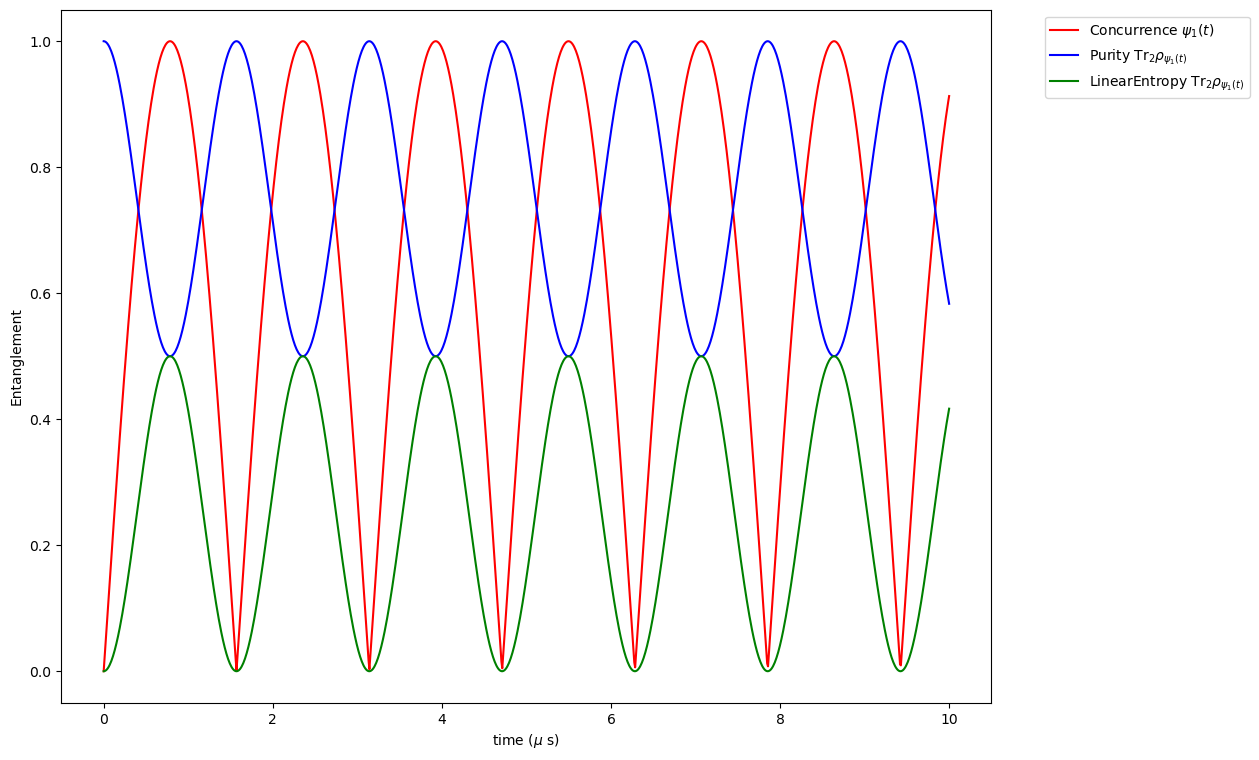

In [38]:
plt.plot(tlist, Conc1,'r',label='Concurrence $\\psi_1(t)$')
plt.plot(tlist, Purity,'b',  label="Purity $\\mathrm{Tr}_2\\rho_{\\psi_1(t)}$")
plt.plot(tlist, LinearEntropy,'g',  label="LinearEntropy $\\mathrm{Tr}_2\\rho_{\\psi_1(t)}$")
plt.xlabel('time ($\\mu$ s)')
plt.ylabel('Entanglement')
#plt.text(1.3, 0.45, '$\\gamma(t)=-\\log \\,P(t)/t$',color='red')
plt.legend(bbox_to_anchor=(1.05, 1))

# Exercises

1. Repeat the same analysis to study the evolution of the purity of the partial traces of a separable two qubit 
pure state under the Ising or the Heisenberg Hamiltonian.
2. Study how evolves under the evolution of the Ising Hamiltonian the von Neumann entropy of the system of the reduced matrix above, defined as
$$
S(\hat \rho)=\mathrm{Tr} \left ( \hat \rho \log \hat \rho \right).
$$
Does it also serve as a mechanism to monitor entanglement?

In [39]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.7.1
Numpy,1.23.5
SciPy,1.10.0
matplotlib,3.6.2
Cython,0.29.33
Number of CPUs,16
BLAS Info,INTEL MKL
IPython,8.10.0
Python,"3.10.9 (main, Jan 11 2023, 15:21:40) [GCC 11.2.0]"
OS,posix [linux]
